# Import

In [1]:
from lab.plot import Plot
from lab.data import Data
import lab.mmath as mm
from lab.arr import Array
import lab.linfit as lf
import lab.constants as const
from lab.utils import uf, totex
from lab.unit import unit as u
import matplotlib.pyplot as plt
print("Import done!")

Import done!


# Read data

In [19]:
la = uf(532, 0, "nm")

In [102]:
d1 = Data("../data/1.csv")
d1.head(5)
totex(d1, "../tex/d1.tex")

21.75757575757576+/-0.7737663839275162 <Unit('dimensionless')>

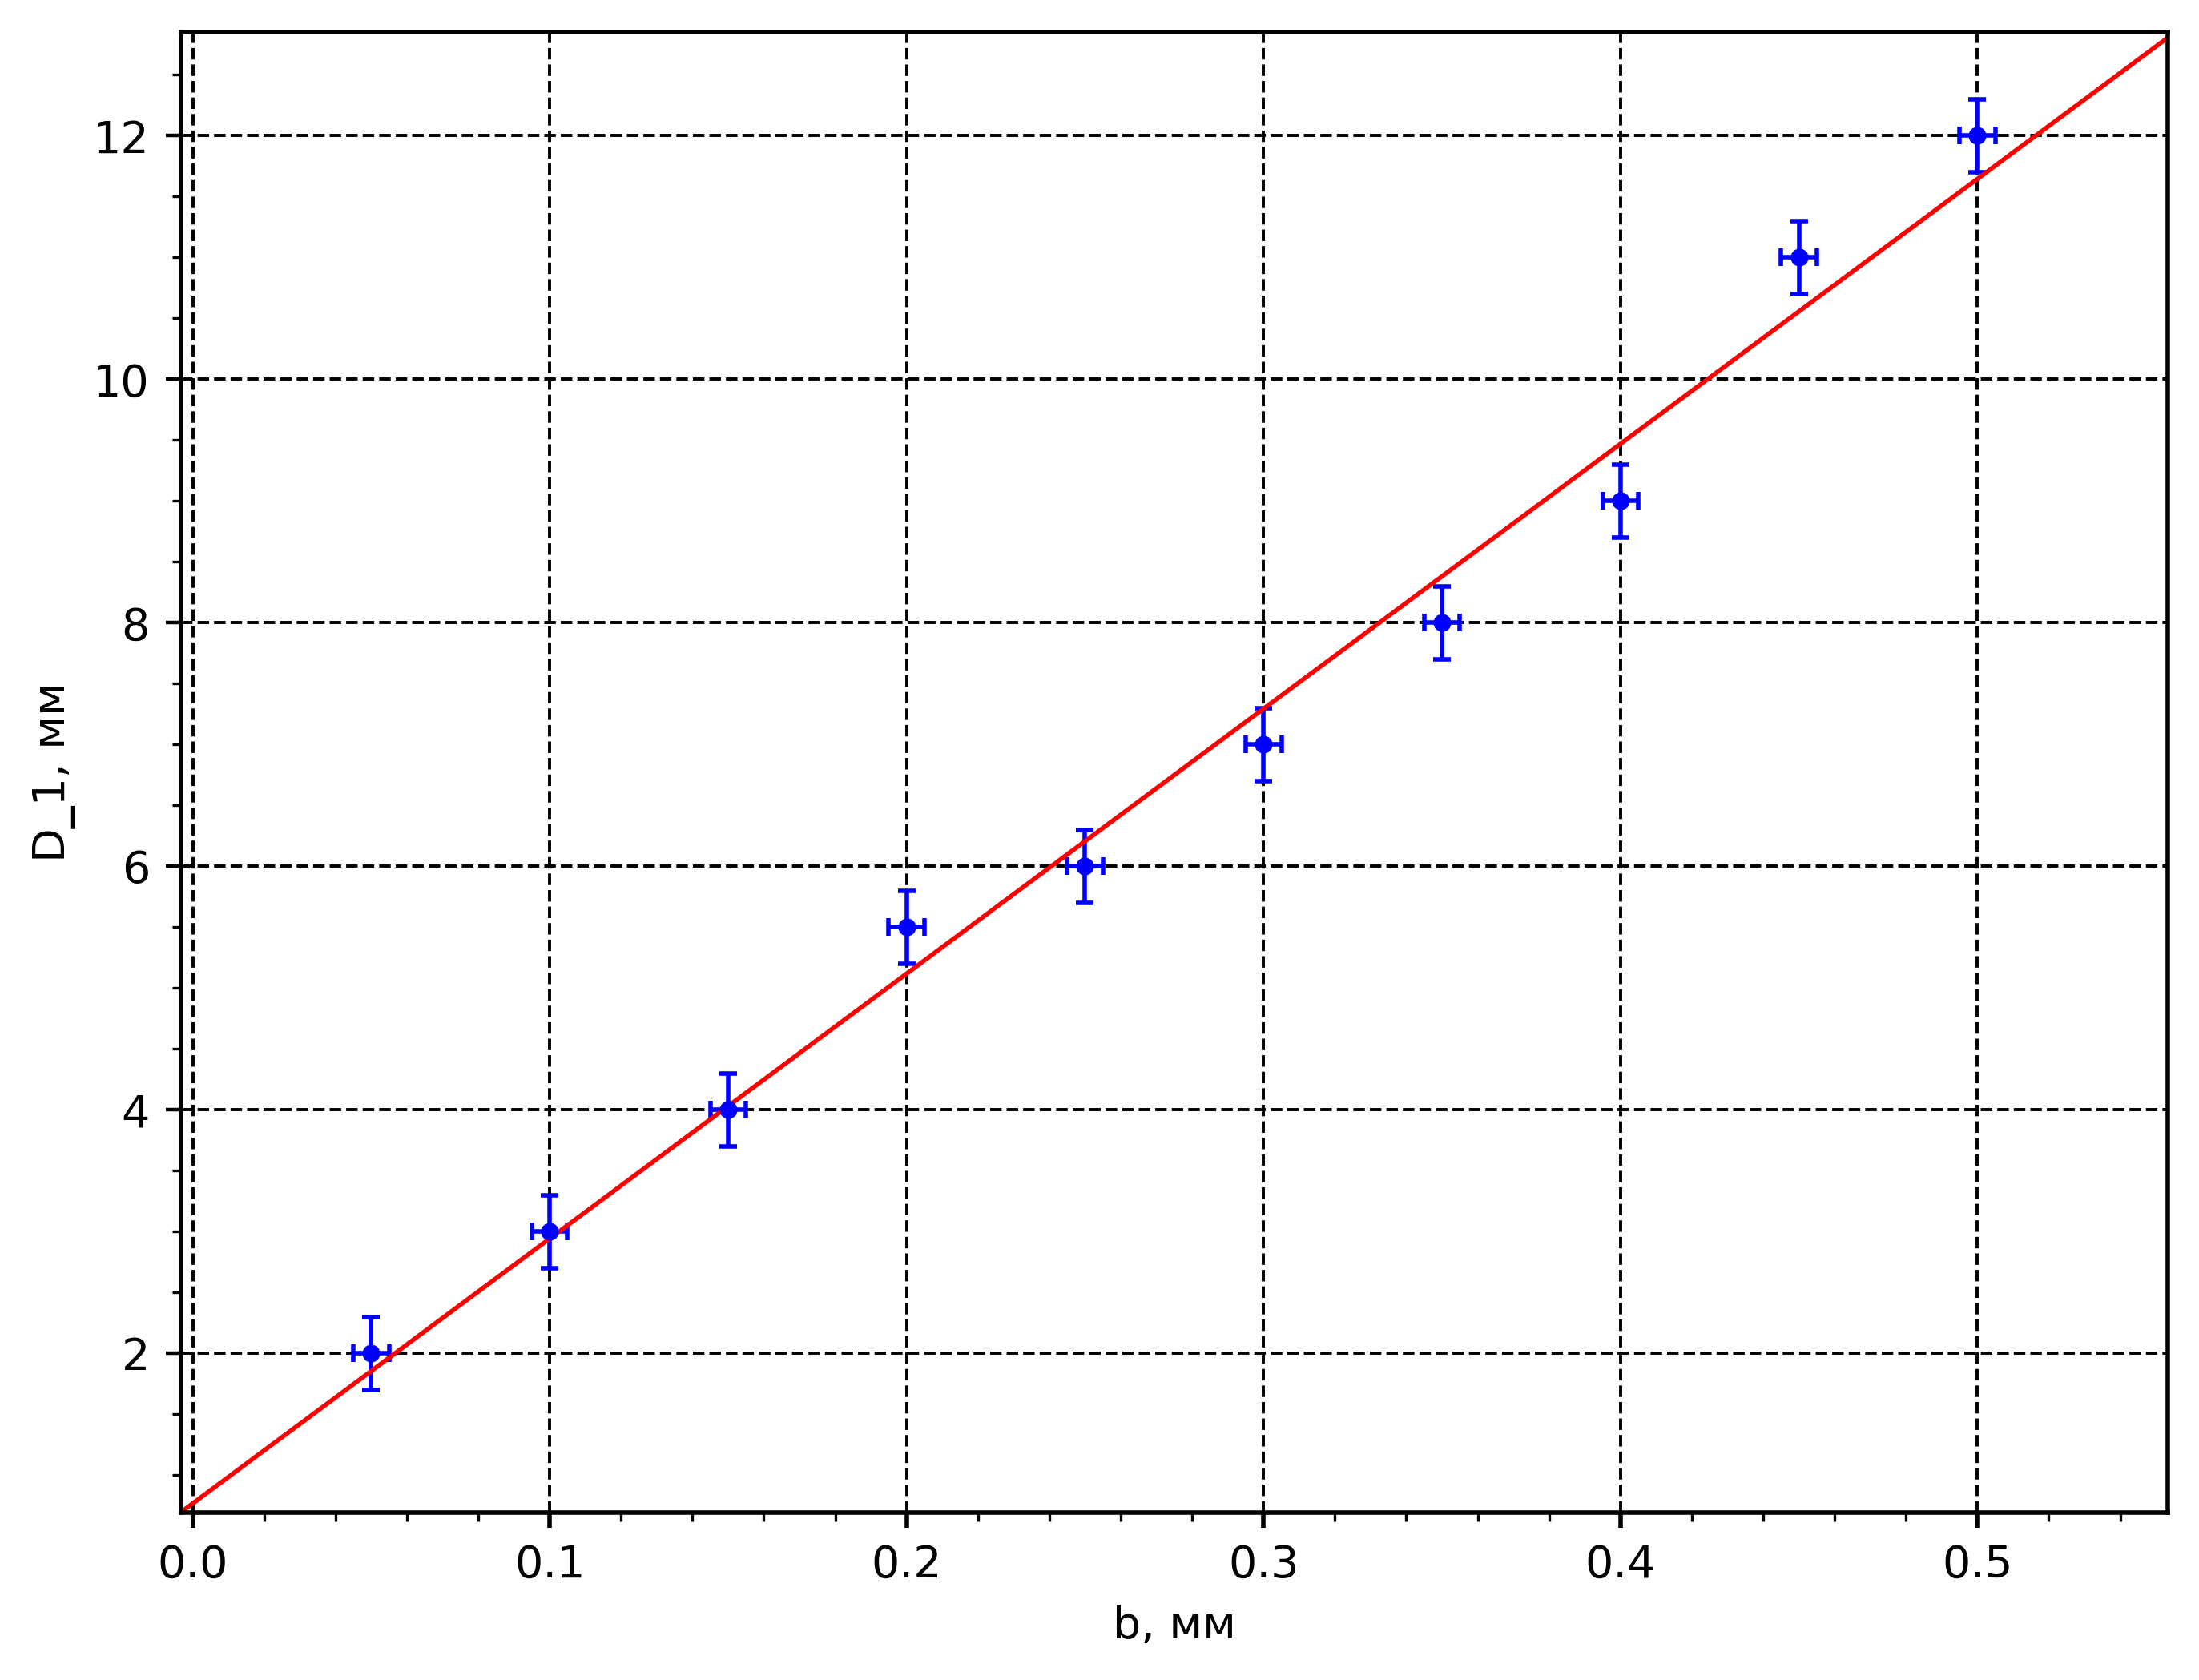

In [103]:
p = Plot(xl="b", yl="D_1")
a, b = lf.chi2(d1["b"], d1["D_1"])
p.plot(d1["b"], d1["D_1"], fmt=".")
p.line(a, b, color="red")
p.save("../img/p1.png")
a

In [104]:
L = uf(127, 0.5, "cm")
d2 = Data("../data/2.csv")
d2["b_c"] = (d2["X"] ** -1 * la * L).ito("mm")
totex(d2, "../tex/d2.tex")
d2.head(10)

b                       X  \
0  0.100+/-0.005 millimeter  7.01+/-0.05 millimeter   
1  0.150+/-0.005 millimeter  4.75+/-0.05 millimeter   
2  0.200+/-0.005 millimeter  3.28+/-0.05 millimeter   
3  0.250+/-0.005 millimeter  2.72+/-0.05 millimeter   
4  0.300+/-0.005 millimeter  2.36+/-0.05 millimeter   
5  0.350+/-0.005 millimeter  1.95+/-0.05 millimeter   
6  0.400+/-0.005 millimeter  1.69+/-0.05 millimeter   
7  0.450+/-0.005 millimeter  1.47+/-0.05 millimeter   

                          b_c  
0  0.0964+/-0.0008 millimeter  
1  0.1422+/-0.0016 millimeter  
2  0.2060+/-0.0032 millimeter  
3    0.248+/-0.005 millimeter  
4    0.286+/-0.006 millimeter  
5    0.346+/-0.009 millimeter  
6    0.400+/-0.012 millimeter  
7    0.460+/-0.016 millimeter

In [105]:
L = uf(127, 0.5, "cm")
d2 = Data("../data/2.csv")
d2["b_c"] = (d2["X"] ** -1 * la * L).ito("mm")
totex(d2, "../tex/d2.tex")
d2.head(10)

b                       X  \
0  0.100+/-0.005 millimeter  7.01+/-0.05 millimeter   
1  0.150+/-0.005 millimeter  4.75+/-0.05 millimeter   
2  0.200+/-0.005 millimeter  3.28+/-0.05 millimeter   
3  0.250+/-0.005 millimeter  2.72+/-0.05 millimeter   
4  0.300+/-0.005 millimeter  2.36+/-0.05 millimeter   
5  0.350+/-0.005 millimeter  1.95+/-0.05 millimeter   
6  0.400+/-0.005 millimeter  1.69+/-0.05 millimeter   
7  0.450+/-0.005 millimeter  1.47+/-0.05 millimeter   

                          b_c  
0  0.0964+/-0.0008 millimeter  
1  0.1422+/-0.0016 millimeter  
2  0.2060+/-0.0032 millimeter  
3    0.248+/-0.005 millimeter  
4    0.286+/-0.006 millimeter  
5    0.346+/-0.009 millimeter  
6    0.400+/-0.012 millimeter  
7    0.460+/-0.016 millimeter

1.0030122660580234+/-0.02535582016994815 <Unit('dimensionless')>

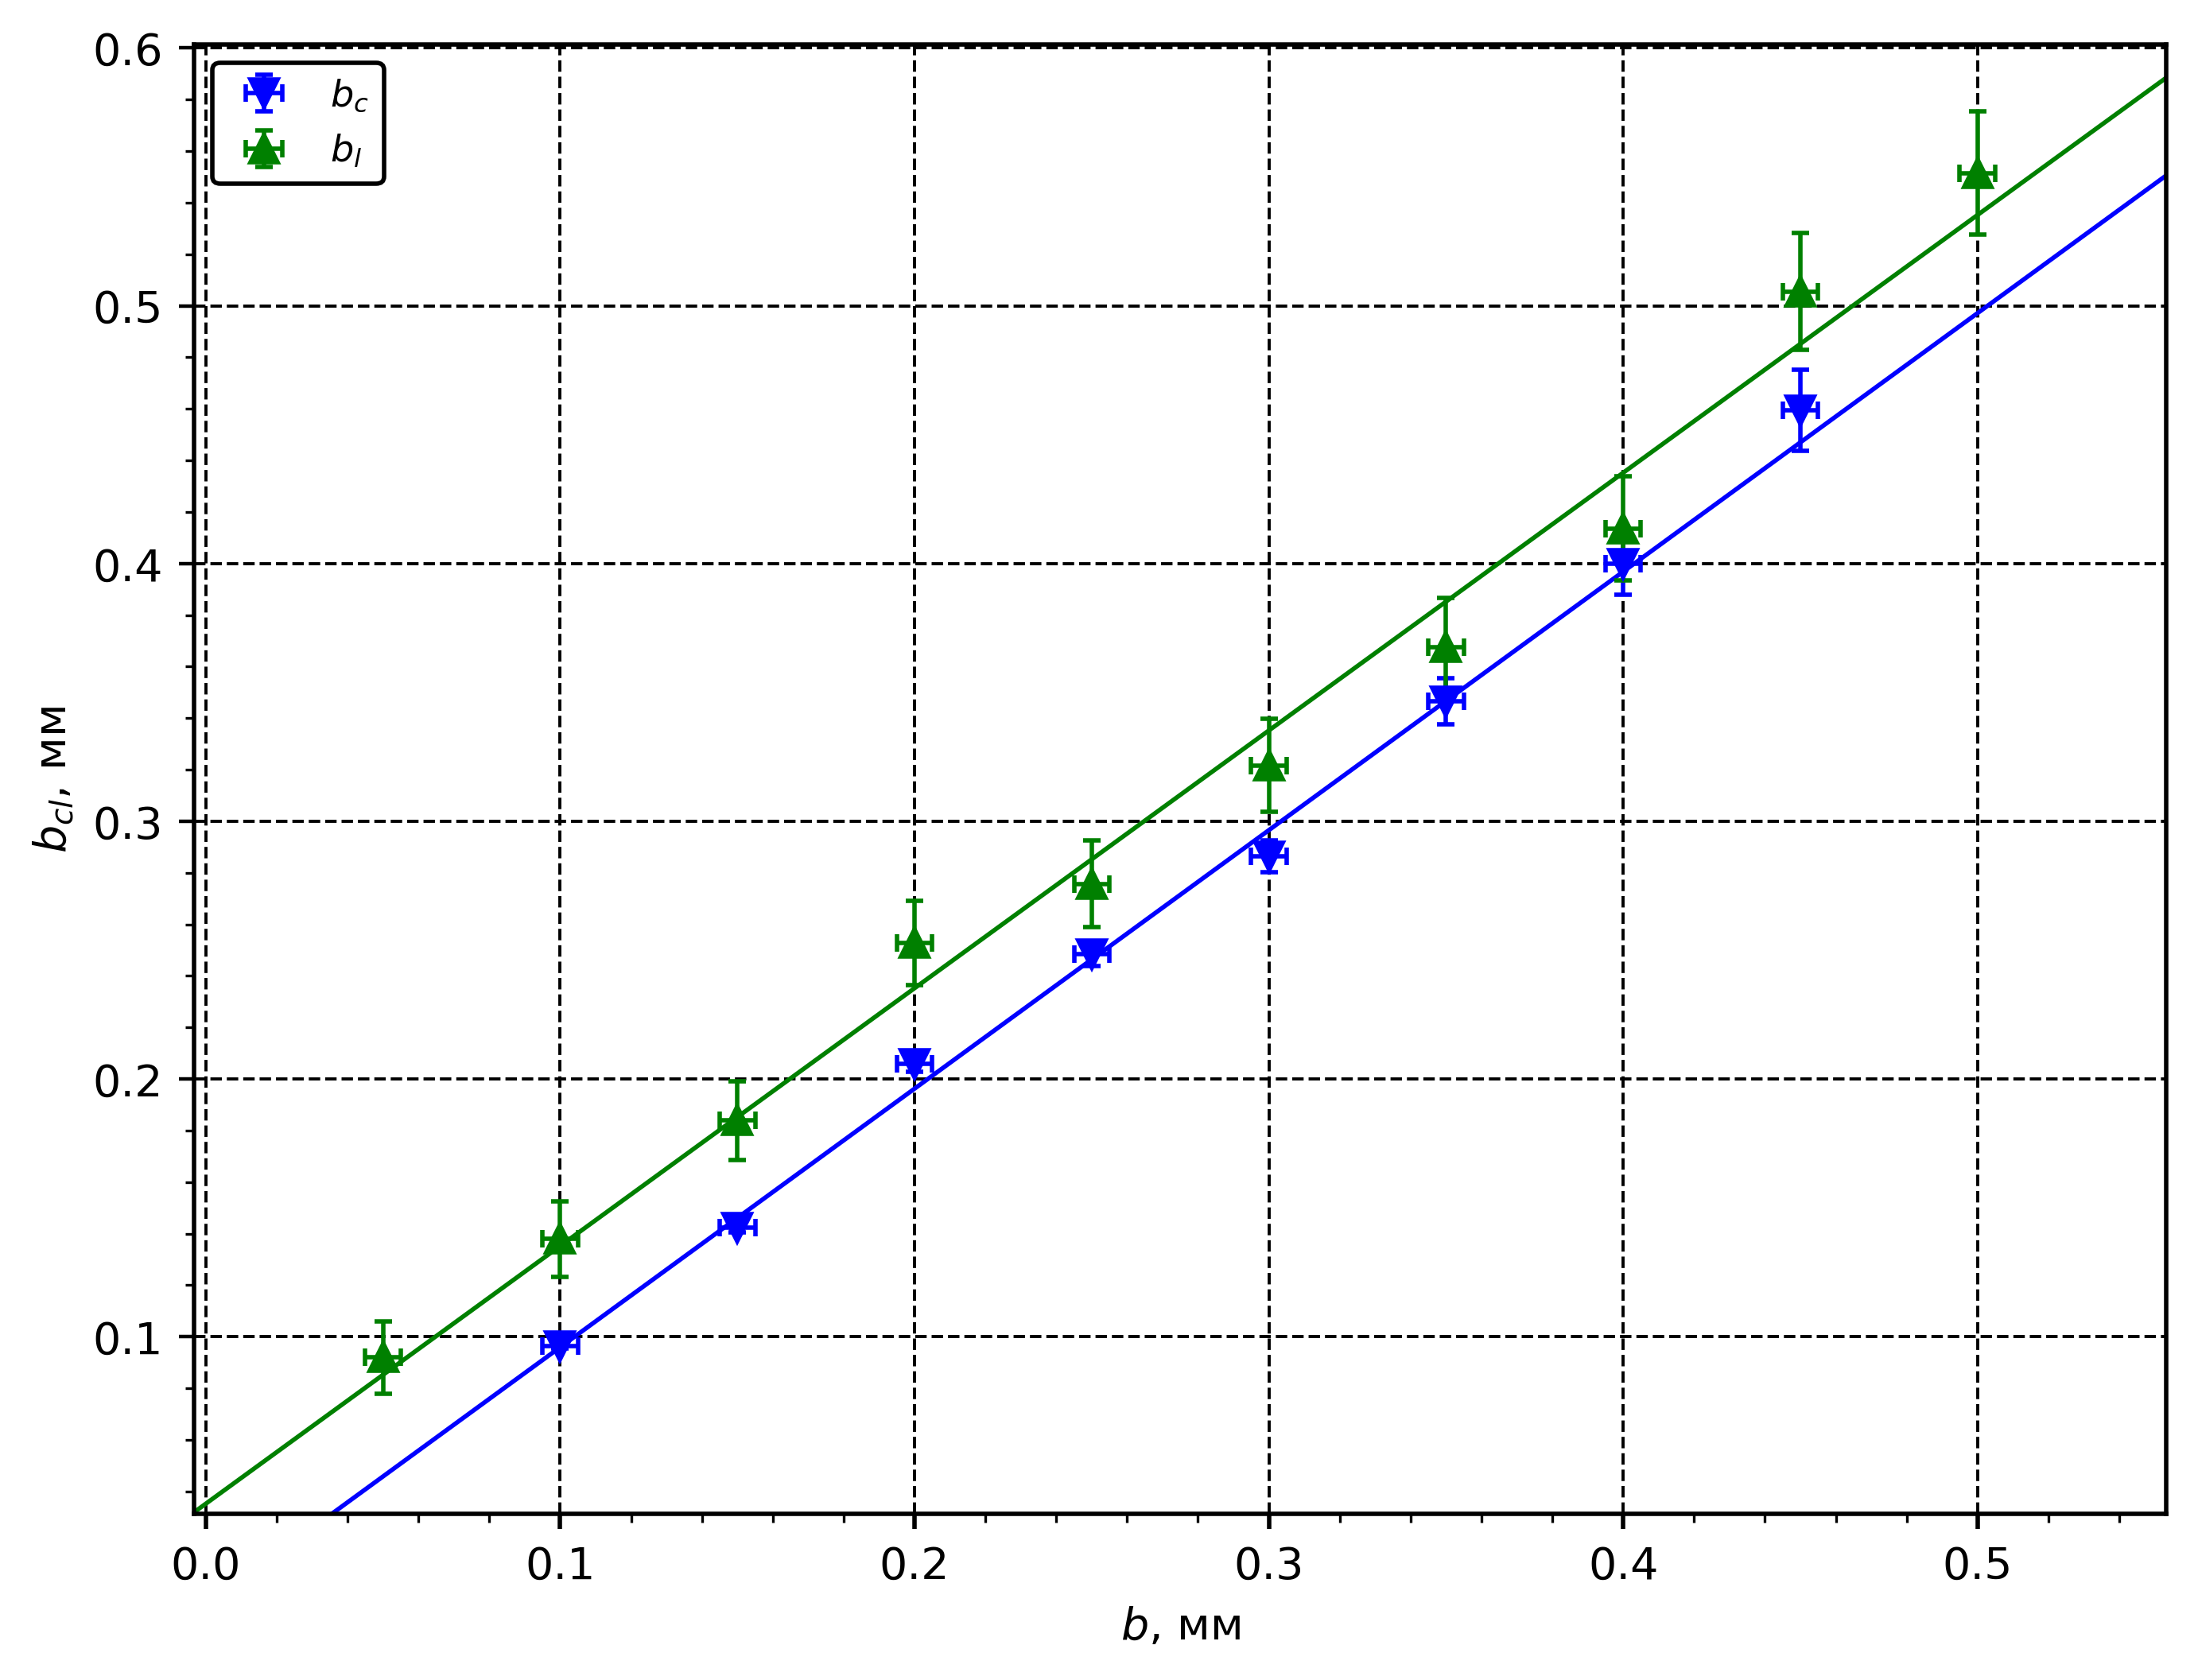

In [109]:
p2 = Plot(xl="$b$", yl="$b_{cl}$")
p2.plot(d2["b"], d2["b_c"], fmt="v", label="$b_c$")
a2, b2 = lf.chi2(d2["b"], d2["b_c"])
p2.line(a2, b2, color="b")
p2.plot(d1["b"], d1["D_1"] / a, fmt="^", label="$b_l$")
p2.line(a / a, b / a, color="g")
p2.ax.legend()
p2.save("../img/p2.png")
a2

# Texify primary data

In [3]:
totex(data, file="../tex/table1.tex")

# Add values

In [4]:
r_hg = uf(13550, 1, "kg/m**3")
r_w = uf(1000, 1, "kg/m**3")
dh = uf(8.4, 0.0025, "cm")
g = const.g
r_hg, r_w, g, dh

(13550.0+/-1.0 <Unit('kilogram / meter ** 3')>,
 1000.0+/-1.0 <Unit('kilogram / meter ** 3')>,
 9.8154+/-0.0001 <Unit('meter / second ** 2')>,
 8.4+/-0.0025 <Unit('centimeter')>)

# Compute

In [6]:
data["p"] = ((data["h1"] - data["h2"]) * r_hg * g - r_w * g * dh).ito(u.Pa)
data["1/T"] = data["T"] ** -1
data["lnp"] = mm.log(data["p"].m)
data.df.head(5)

T                          h1  \
0  293.00+/-0.05 kelvin  5.1900+/-0.0025 centimeter   
1  295.00+/-0.05 kelvin  5.3000+/-0.0025 centimeter   
2  296.00+/-0.05 kelvin  5.3450+/-0.0025 centimeter   
3  297.00+/-0.05 kelvin  5.4200+/-0.0025 centimeter   
4  298.00+/-0.05 kelvin  5.5000+/-0.0025 centimeter   

                           h2                p  \
0  2.5800+/-0.0025 centimeter  2647+/-5 pascal   
1  2.5000+/-0.0025 centimeter  2899+/-5 pascal   
2  2.4400+/-0.0025 centimeter  3039+/-5 pascal   
3  2.3600+/-0.0025 centimeter  3245+/-5 pascal   
4  2.2950+/-0.0025 centimeter  3438+/-5 pascal   

                              1/T                            lnp  
0  0.0034130+/-0.0000006 / kelvin  7.8811+/-0.0018 dimensionless  
1  0.0033898+/-0.0000006 / kelvin  7.9723+/-0.0017 dimensionless  
2  0.0033784+/-0.0000006 / kelvin  8.0193+/-0.0016 dimensionless  
3  0.0033670+/-0.0000006 / kelvin  8.0850+/-0.0015 dimensionless  
4  0.0033557+/-0.0000006 / kelvin  8.1427+/-0.0014 dimensionless

# Plot

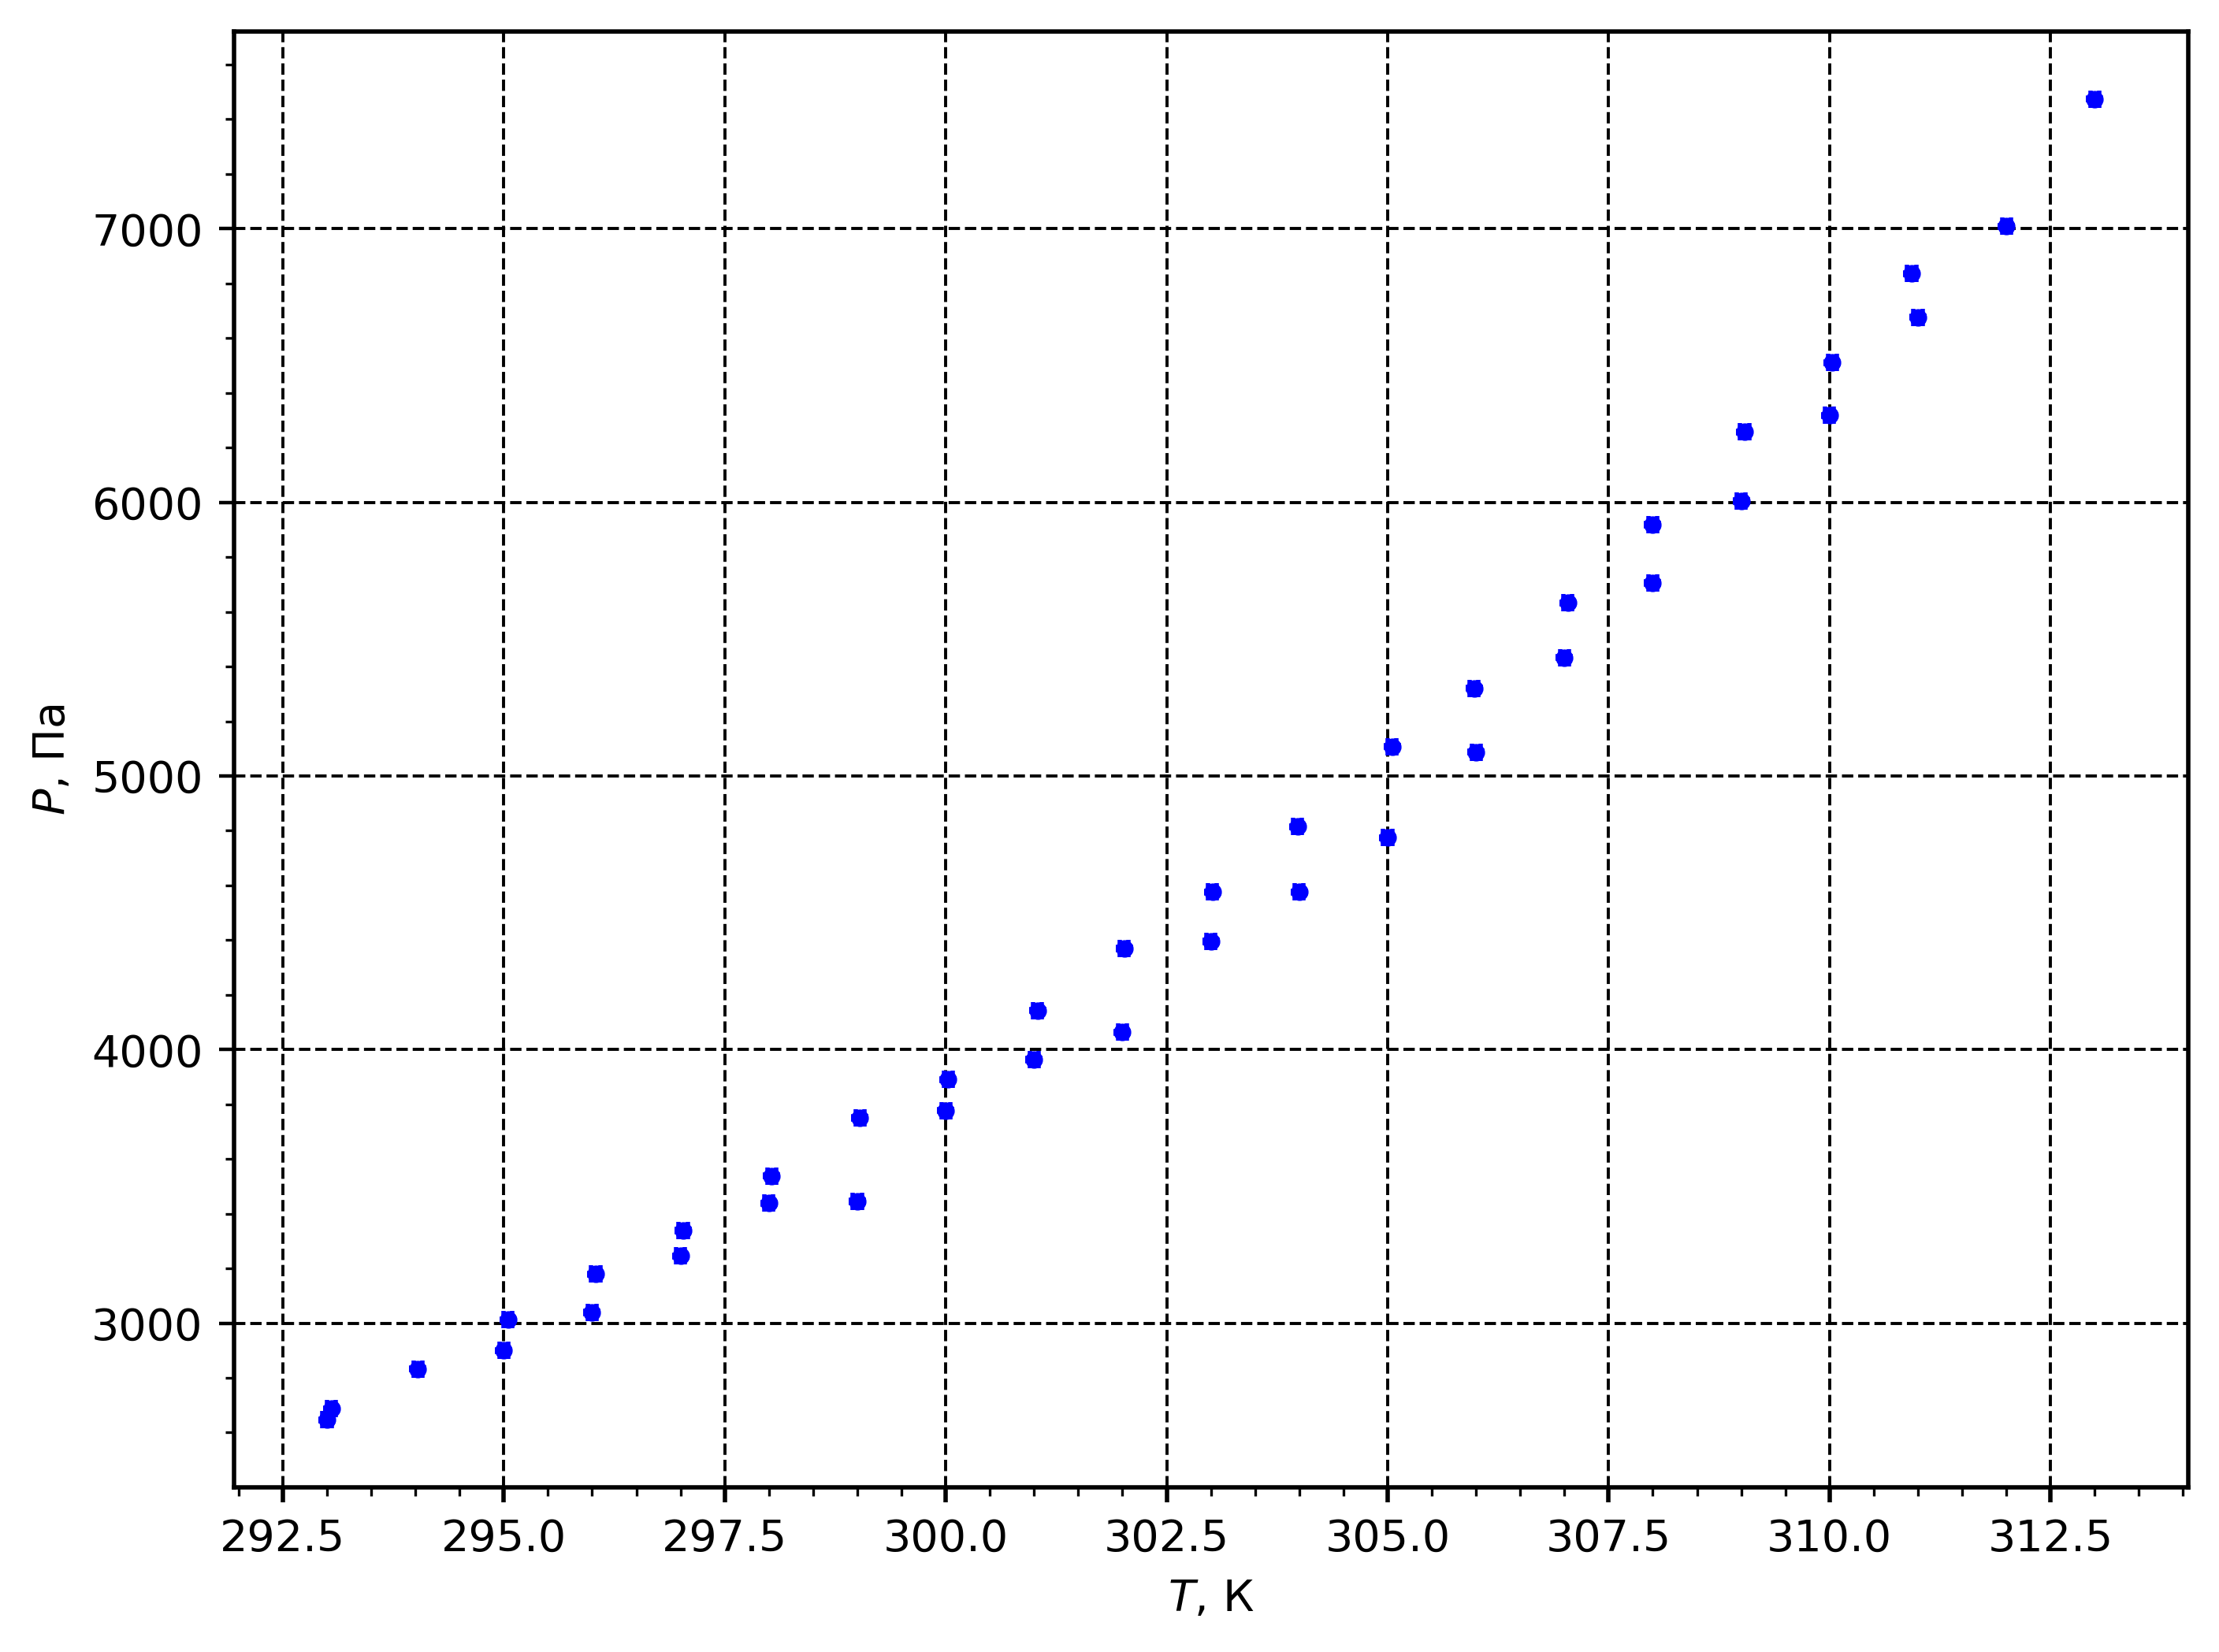

In [7]:
p1 = Plot(yl="$P$", xl="$T$")
p1.plot(data["T"], data["p"], fmt=".")

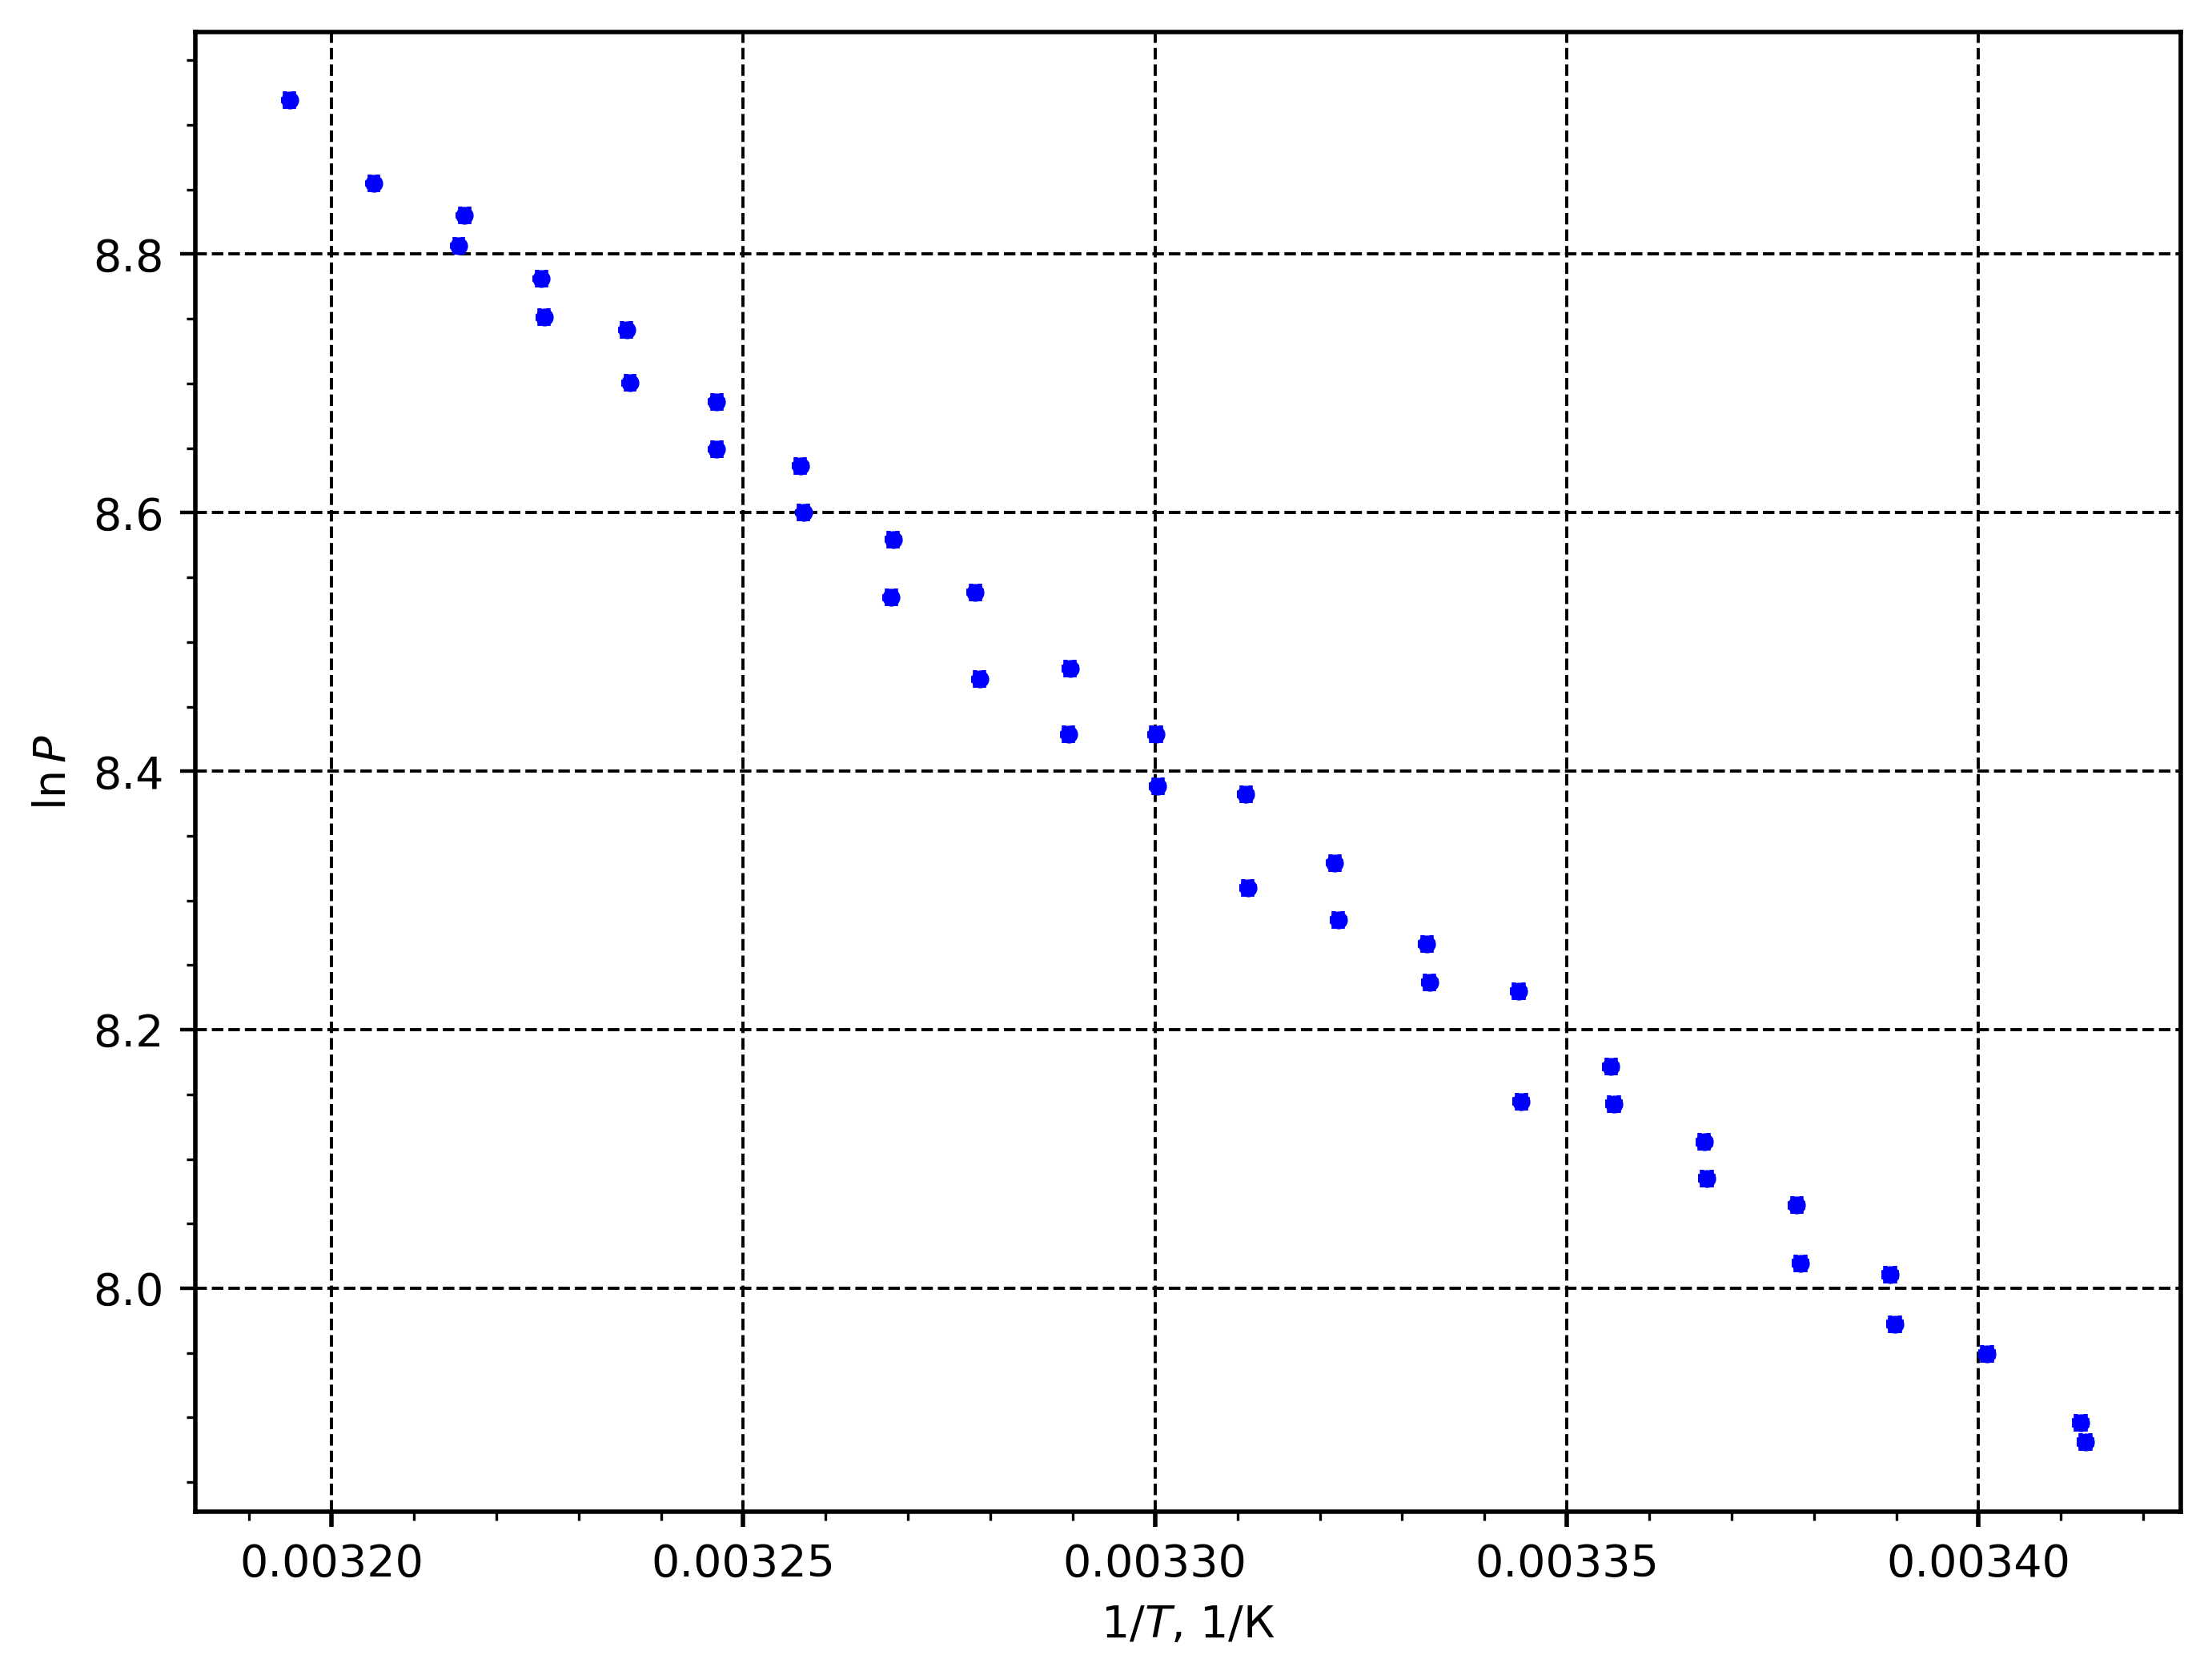

In [8]:
p2 = Plot(yl="$\\ln P$", xl="$1/T$")
p2.plot(data["1/T"], data["lnp"], fmt=".")

# Linear fit

In [9]:
k1, b1 = lf.chi2(data["T"], data["p"])
k2, b2 = lf.chi2(data["1/T"], data["lnp"])
print(f"k1 = {k1}\nk2 = {k2}")
print(f"b1 = {b1}\nb2 = {b2}")

k1 = 234+/-6 pascal / kelvin
k2 = (-4.76+/-0.06)e+03 kelvin
b1 = (-6.61+/-0.18)e+04 pascal
b2 = 24.13+/-0.20 dimensionless


# Plot lines and save

In [10]:
p1.line(k1, b1, color="black")
p1.save("../img/plot1.png")

In [11]:
p2.line(k2, b2, color="black")
p2.save("../img/plot2.png")

# Result

In [12]:
L1 = const.R * data["T"].mean() ** 2 / data["p"].mean() * k1
L2 = -const.R * k2
print(f"L1 = {L1}\nL2 = {L2}")

L1 = (3.86+/-0.10)e+04 joule / mole
L2 = (3.96+/-0.05)e+04 joule / mole


In [13]:
totex(L1)
totex(L2)

\left(38{,}6 \pm 1{,}0\right)\cdot 10^{3}\;\text{Дж} / \text{моль}
39600 \pm 500\;\text{Дж} / \text{моль}


# Texify intermediate data

In [15]:
totex(data, file="../tex/table2.tex", columns={
    "T": "T",
    "h1": "h_1",
    "h2": "h_2",
    "p": "P",
    "1/T": "T^{-1}",
    "lnp": "\ln P",
})